<a href="https://colab.research.google.com/github/Parkseojin2001/Deep-learning_with_Python/blob/main/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.1 일반화: 머신 러닝의 목표

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.keras.backend.set_floatx('float16')

In [3]:
# MNIST에 백색 잡음 픽셀과 0픽셀 추가하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
# 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 9ms/step - loss: 0.6274 - accuracy: 0.8145 - val_loss: 0.2954 - val_accuracy: 0.9136
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2588 - accuracy: 0.9321 - val_loss: 0.2053 - val_accuracy: 0.9385
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1714 - accuracy: 0.9673 - val_loss: 0.1560 - val_accuracy: 0.9565
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1232 - accuracy: 0.9814 - val_loss: 0.1381 - val_accuracy: 0.9600
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0919 - accuracy: 0.9878 - val_loss: 0.1599 - val_accuracy: 0.9561
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0686 - accuracy: 0.9927 - val_loss: 0.1367 - val_accuracy: 0.9614
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0513 - accuracy: 0.9966 - val_loss: 0.1161 - val_accuracy: 0.9678
Epoch 

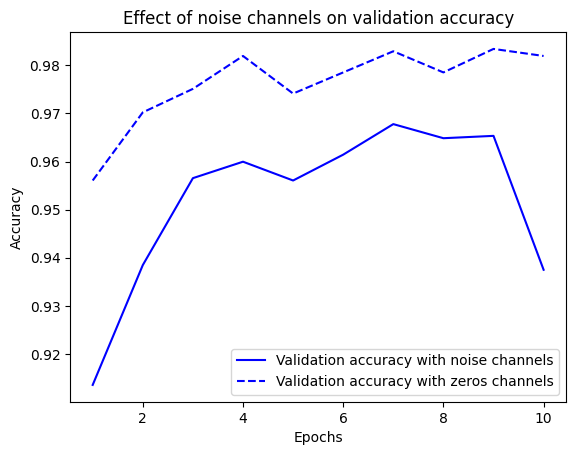

In [6]:
# 검증 정확도 비교 그래프 그리기

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
# 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: inf - accuracy: 0.1022 - val_loss: 2.2930 - val_accuracy: 0.1079
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1147 - val_loss: 2.3086 - val_accuracy: 0.1108
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1285 - val_loss: 2.3086 - val_accuracy: 0.1044
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: inf - accuracy: 0.1372 - val_loss: 2.3262 - val_accuracy: 0.1072
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: inf - accuracy: 0.1461 - val_loss: 2.3359 - val_accuracy: 0.1058
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: inf - accuracy: 0.1609 - val_loss: 2.3418 - val_accuracy: 0.1033
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: inf - accuracy: 0.1770 - val_loss: 2.3555 - val_accuracy: 0.1080
Epoch 8/100
375/375 

### 5.3.3 모델 용량 늘리기

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [9]:
# MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델

model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
								loss="sparse_categorical_crossentropy",
								metrics=["accuracy"])
history_small_model = model.fit(
		train_images, train_labels,
		epochs=20,
		batch_size=128,
		validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6699 - accuracy: 0.8418 - val_loss: 0.3643 - val_accuracy: 0.9048
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3530 - accuracy: 0.9067 - val_loss: 0.3108 - val_accuracy: 0.9165
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3196 - accuracy: 0.9214 - val_loss: 0.2942 - val_accuracy: 0.9209
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.9253 - val_loss: 0.2876 - val_accuracy: 0.9199
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.9282 - val_loss: 0.2810 - val_accuracy: 0.9229
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2874 - accuracy: 0.9307 - val_loss: 0.2759 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9331 - val_loss: 0.2739 - val_accuracy: 0.9253
Epoch 

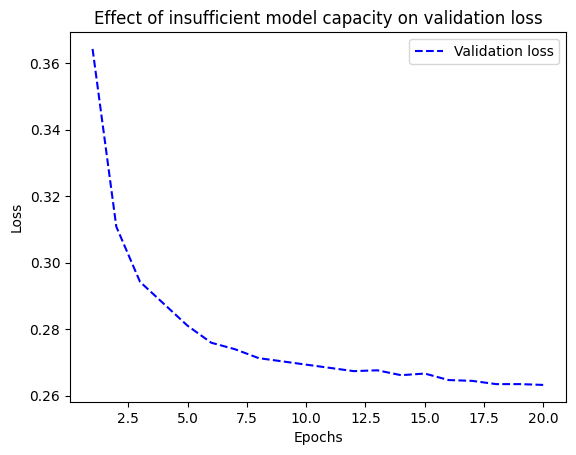

In [10]:
# 손실 곡선
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
# 용량이 큰 모델(층 추가)

model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs = 20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3738 - accuracy: 0.9033 - val_loss: 0.1833 - val_accuracy: 0.9492
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1693 - accuracy: 0.9692 - val_loss: 0.1456 - val_accuracy: 0.9575
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1173 - accuracy: 0.9858 - val_loss: 0.1182 - val_accuracy: 0.9658
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0912 - accuracy: 0.9907 - val_loss: 0.1083 - val_accuracy: 0.9692
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0723 - accuracy: 0.9946 - val_loss: 0.1011 - val_accuracy: 0.9712
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0608 - accuracy: 0.9961 - val_loss: 0.0908 - val_accuracy: 0.9751
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0497 - accuracy: 0.9966 - val_loss: 0.0976 - val_accuracy: 0.9775
Epoch 

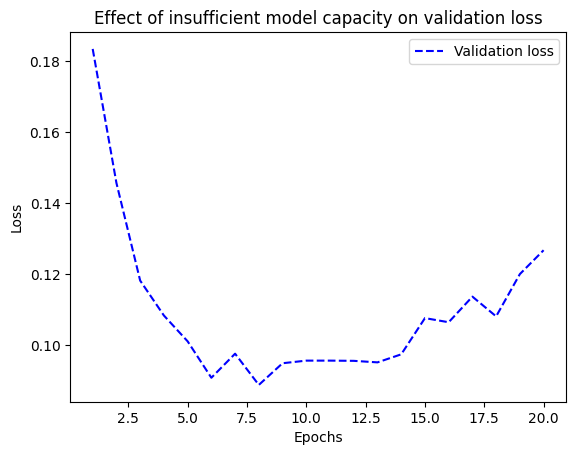

In [13]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()